#                                        Customer churn analysis and prediction

## Importer des bibliothèques :

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Chargez les données :

In [ ]:
df = pd.read_csv("Telco-Customer-Churn.csv")

## Affichage de Donnees:

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Examinez les dimensions de l'ensemble de données.

In [ ]:
df.shape

(7043, 21)

### Obtenir les informations de l'ensemble de données :
#### Inspectez les types de données de chaque colonne.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**"customerID"** n'est pas nécessaire et le type de **"TotalCharges"** est un objet au lieu d'un type numérique.

### Supprimez la colonne "customerID"

In [ ]:
df.drop("customerID", axis='columns', inplace=True)

### Convertir 'TotalCharges' en numérique

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

### Vérifier les valeurs manquantes

In [ ]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Remplacer les lignes avec des valeurs manquantes par la moyenne

In [ ]:
# Calculer la moyenne de 'TotalCharges'
TotalCharges_mean = df['TotalCharges'].mean()

# Remplacer les valeurs manquantes par la moyenne
df['TotalCharges'] = df['TotalCharges'].fillna(TotalCharges_mean)

#### Revérifiez les valeurs manquantes

In [ ]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Vérifier le nombre des doublons

In [ ]:
df.duplicated().sum()

22

### Supprimer les doublons

In [ ]:
df = df.drop_duplicates()

#### Statistiques descriptives de l'ensemble de données :

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7021.000000,7021.000000,7021.000000,7021.000000
mean,0.162512,32.469449,64.851894,2290.342338
std,0.368947,24.534965,30.069001,2265.044153
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,411.150000
50%,0.000000,29.000000,70.400000,1410.250000
75%,0.000000,55.000000,89.900000,3801.700000
max,1.000000,72.000000,118.750000,8684.800000


## Analyse exploratoire des données (EDA)

### Analyser et visualiser des colonnes spécifiques :

#### La distribution de la variable ‘Churn’

In [ ]:
df['Churn'].value_counts()

No     5164
Yes    1857
Name: Churn, dtype: int64

In [ ]:
fig = px.histogram(df, x="Churn", color="Churn")
fig.update_layout(
    title_text='Distribution de Churn',
    autosize=False,
    width=900,
    height=500
)
fig.show()

 L'ensemble de données est déséquilibré avec une proportion plus élevée de clients qui ne se sont pas désabonnés.

#### la distribution de ‘Churn’ par rapport à ‘Gender’

In [ ]:
fig = px.histogram(df, x="gender", color="Churn")
fig.update_layout(
    title_text='Churn par rapport à Gender',
    autosize=False,
    width=900,
    height=500
    )
fig.show()

- Pour les deux genres, la majorité des clients ne se sont pas désabonnés. C’est représenté par les barres bleues marquées ‘No’, qui atteignent environ **2500** pour les deux genres.

- Une portion plus petite de clients de chaque genre s’est désabonnée. C’est représenté par les barres rouges marquées ‘Yes’, qui atteignent environ **934** pour les femmes et un peu moins (**923**) pour les hommes.

- Il semble que la répartition du désabonnement (Churn) est à peu près la même pour les deux genres. Cela suggère que le genre n’a peut-être pas un impact significatif sur le désabonnement.

#### Histogramme pour voir la distribution de la « Tenure » dans votre ensemble de données

la durée pendant laquelle les clients restent avant de se désinscrire

In [ ]:
fig = px.histogram(df, x="tenure", color="Churn", nbins=30)
fig.update_layout(
    title_text='Customer Churn by Tenure',
    autosize=False,
    width=800,  # Width of the figure in pixels
    height=600,  # Height of the figure in pixels
    bargap=0.1,  # Gap between bars of adjacent location coordinates
)
fig.show()

**Churn à court terme :** Il semble y avoir un nombre significatif de clients qui se désabonnent à court terme (tenure proche de 0). Cela pourrait indiquer que de nombreux clients ne sont pas satisfaits au début de leur abonnement.

**Churn à long terme :** À mesure que la durée de l’abonnement augmente (tenure), le nombre de clients qui se désabonnent diminue. Cela pourrait indiquer que les clients qui restent abonnés plus longtemps sont généralement plus satisfaits du service.

=> la durée de l’abonnement (tenure) pourrait être un facteur important à considérer dans l'analyse du taux de désabonnement.

=> pourquoi certains clients se désabonnent à court terme?

#### La distribution de ‘Churn’ pour chaque type de contrat

In [ ]:
df['Contract'].value_counts()

Month-to-month    3853
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [ ]:
fig = px.histogram(df, x="Contract", color="Churn")
fig.update_layout(
    title_text='Churn par rapport à Contract',
    autosize=False,
    width=800,  # Width of the figure in pixels
    height=600  # Height of the figure in pixels
)
fig.show()


*   **Contrats mensuels :** Les clients avec des contrats mensuels semblent avoir le taux de désabonnement le plus élevé. Cela pourrait être dû à la flexibilité de ces contrats, qui permettent aux clients de se désabonner plus facilement.

*   **Contrats annuels :** Les clients avec des contrats d’un an et de deux ans ont un taux de désabonnement beaucoup plus faible. Cela pourrait indiquer que ces clients sont plus satisfaits du service, ou qu’ils sont plus engagés en raison de la durée plus longue de leur contrat.

*   **Stratégies de rétention :** Ces observations suggèrent que l’une des stratégies pour réduire le taux de désabonnement pourrait être d’encourager les clients à opter pour des contrats plus longs. Cela pourrait se faire en offrant des incitatifs ou des réductions pour les contrats d’un an ou de deux ans.


#### La distribution de ‘Churn’ pour chaque type de service d'internet

In [ ]:
fig = px.histogram(df, x="InternetService", color="Churn")
fig.update_layout(
    title_text='Churn par rapport à InternetService',
    autosize=False,
    width=600,  # Width of the figure in pixels
    height=400  # Height of the figure in pixels
)
fig.show()

*   **DSL :** La majorité des clients avec un service Internet DSL ne se sont pas désabonnés. Cela pourrait indiquer que les clients sont généralement satisfaits de ce service.

*  **Fibre optique :** Il y a presque autant de clients qui se sont désabonnés que de clients qui sont restés abonnés. Cela pourrait indiquer un problème avec le service de fibre optique, comme un coût élevé ou une qualité de service insatisfaisante.

* **Pas de service Internet :** La majorité des clients sans service Internet ne se sont pas désabonnés. Cela pourrait indiquer que ces clients sont satisfaits des autres services qu’ils reçoivent.

#### La distribution de ‘Churn’ pour chaque méthode de paiement

In [ ]:
fig = px.histogram(df, x="PaymentMethod", color="Churn")
fig.update_layout(
    title_text='Churn par rapport à PaymentMethod',
    autosize=False,
    width=800,  # Width of the figure in pixels
    height=600  # Height of the figure in pixels
)
fig.update_xaxes(tickangle=45)  # Rotate x-axis labels
fig.show()

*  **Chèque électronique :** Les clients qui utilisent le chèque électronique comme méthode de paiement semblent avoir le taux de désabonnement le plus élevé. Cela pourrait indiquer que ces clients sont moins satisfaits du service ou qu’ils trouvent cette méthode de paiement moins pratique.

*   **Virement bancaire et carte de crédit :** Les clients qui utilisent le virement bancaire automatique ou la carte de crédit automatique comme méthode de paiement ont un taux de désabonnement plus faible. Cela pourrait indiquer que ces méthodes de paiement sont plus pratiques pour les clients ou qu’ils sont généralement plus satisfaits du service.

*   **Stratégies de rétention :** Ces observations suggèrent que l’une des stratégies pour réduire le taux de désabonnement pourrait être d’encourager les clients à utiliser des méthodes de paiement automatiques, comme le virement bancaire ou la carte de crédit. Cela pourrait se faire en offrant des incitatifs ou des réductions pour ces méthodes de paiement.


#### Heatmap de corrélation

In [ ]:
import plotly.figure_factory as ff

correlation_matrix = df.corr()
fig = ff.create_annotated_heatmap(
    z=correlation_matrix.values,
    x=list(correlation_matrix.columns),
    y=list(correlation_matrix.index),
    annotation_text=correlation_matrix.round(2).values,
    colorscale='YlGnBu',  # Change the colorscale here
    showscale=True
)
fig.update_layout(
    title_text='Correlation Heatmap',
    autosize=False,
    width=700,  # Width of the figure in pixels
    height=600  # Height of the figure in pixels
)
fig.show()

<ipython-input-22-d4fa33466b65>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



* **Corrélation entre tenure et MonthlyCharges :** La corrélation entre la durée de l’abonnement (tenure) et les frais mensuels (MonthlyCharges) est de 0,25. Cela indique une corrélation positive faible, ce qui signifie que lorsque la durée de l’abonnement augmente, les frais mensuels ont tendance à augmenter légèrement.

* **Corrélation entre tenure et TotalCharges :** Il y a une forte corrélation positive (0,82) entre la durée de l’abonnement (tenure) et les frais totaux (TotalCharges). Cela est logique car plus un client reste longtemps, plus il est susceptible d’avoir payé des frais totaux plus élevés.

* **Corrélation entre MonthlyCharges et TotalCharges :** Il y a également une corrélation positive modérée (0,65) entre les frais mensuels (MonthlyCharges) et les frais totaux (TotalCharges). Cela suggère que les clients qui paient des frais mensuels plus élevés ont tendance à avoir des frais totaux plus élevés.

* Les autres corrélations sont faibles,

# **Recap de l'EDA :**
#### **1. Analyse globale :**

* Durée de l’abonnement : La durée de l’abonnement (tenure) semble avoir un impact significatif sur le désabonnement des clients. Les clients avec une durée d’abonnement plus courte ont tendance à se désabonner plus fréquemment.

* Type de contrat : Les clients avec des contrats mensuels ont un taux de désabonnement plus élevé. Cela pourrait être dû à la flexibilité de ces contrats, qui permettent aux clients de se désabonner plus facilement.

* Méthode de paiement : Les clients qui utilisent le chèque électronique comme méthode de paiement semblent avoir le taux de désabonnement le plus élevé.

#### **2. Stratégies pour réduire le taux de désabonnement :**

* Encourager les contrats à long terme : Encouragez les clients à opter pour des contrats plus longs en offrant des incitatifs ou des réductions pour les contrats d’un an ou de deux ans.

* Promouvoir les méthodes de paiement automatiques : Encouragez les clients à utiliser des méthodes de paiement automatiques, comme le virement bancaire ou la carte de crédit, en offrant des incitatifs ou des réductions pour ces méthodes de paiement.

* Améliorer l’expérience client à court terme : Examinez pourquoi certains clients se désabonnent à court terme et comment vous pouvez améliorer la satisfaction des clients à ce stade

## Étape 3 : Prétraitement des données

#### Affiche les valeurs unique pour les colonnes categorique

In [ ]:
def fetsh_unique_cat_val(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f"{column} : {df[column].unique()}")

In [ ]:
fetsh_unique_cat_val(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


#### Remplaer 'No phone service' et 'No internet service' par 'No'

In [ ]:
df.replace('No phone service', 'No', inplace=True)
df.replace('No internet service', 'No', inplace=True)
fetsh_unique_cat_val(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


#### Extraire les colonnes qui ont juste oui ou non comme valeurs

In [ ]:
# Créer une liste vide pour stocker les noms des colonnes
columns_yes_no = []

# Parcourir chaque colonne de votre DataFrame
for column in df:
    # Si le type de données de la colonne est 'object'
    if df[column].dtypes == 'object':
        # Si les valeurs uniques de la colonne sont 'Yes' et 'No'
        if set(df[column].unique()) == {'Yes', 'No'}:
            # Ajouter le nom de la colonne à la liste
            columns_yes_no.append(column)

# Afficher les colonnes qui ont uniquement les valeurs 'Yes' ou 'No'
print(columns_yes_no)

['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']


In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Remplacer les Yes par 1 et les No par 0

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Créez une instance de LabelEncoder
label_encoder = LabelEncoder()


for column in columns_yes_no:
    df[column] = label_encoder.fit_transform(df[column])

# Affichez le DataFrame après l'encodage
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


#### Remplacer pour 'gender' {Female : 1}, {Male : 0}

In [ ]:
df['gender'].replace({'Female' : 1, 'Male': 0}, inplace=True)

In [ ]:
for column in df:
    print(f"{column} : {df[column].unique()}")

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


### Encoding :

#### One Hot Encoding les colonnes catégorielles 'InternetService', 'Contract ', 'PaymentMethod '

In [ ]:
new_df = pd.get_dummies(data=df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

In [ ]:
new_df.dtypes

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
InternetService_Fiber optic                uint8
InternetService_No                         uint8
Contract_One year                          uint8
Contract_Two year   

In [ ]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,0,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


### Scaling :

#### Scale les colonnes suivants avec MinMaxScaler 'tenure', 'MonthlyCharges', 'TotalCharges'

In [ ]:
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Define the scaler
scaler = MinMaxScaler().fit(new_df[cols_to_scale])

# Scale the dataframe
new_df[cols_to_scale] = scaler.transform(new_df[cols_to_scale])

This code will scale the **‘tenure’, ‘MonthlyCharges’, and ‘TotalCharges’** columns to be between 0 and 1.

In [ ]:
for column in new_df:
    print(f"{column} : {new_df[column].unique()}")

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.01388889 0.47222222 0.02777778 0.625      0.11111111 0.30555556
 0.13888889 0.38888889 0.86111111 0.18055556 0.22222222 0.80555556
 0.68055556 0.34722222 0.95833333 0.72222222 0.98611111 0.29166667
 0.16666667 0.41666667 0.65277778 1.         0.23611111 0.375
 0.06944444 0.63888889 0.15277778 0.97222222 0.875      0.59722222
 0.20833333 0.83333333 0.25       0.91666667 0.125      0.04166667
 0.43055556 0.69444444 0.88888889 0.77777778 0.09722222 0.58333333
 0.48611111 0.66666667 0.40277778 0.90277778 0.52777778 0.94444444
 0.44444444 0.76388889 0.51388889 0.5        0.56944444 0.08333333
 0.05555556 0.45833333 0.93055556 0.31944444 0.79166667 0.84722222
 0.19444444 0.27777778 0.73611111 0.55555556 0.81944444 0.33333333
 0.61111111 0.26388889 0.75       0.70833333 0.36111111 0.
 0.54166667]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tec

In [ ]:
new_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.013889,0,0,0,1,0,...,0.115423,0.001275,0,0,0,0,0,0,1,0
1,0,0,0,0,0.472222,1,0,1,0,1,...,0.385075,0.215867,0,0,0,1,0,0,0,1
2,0,0,0,0,0.027778,1,0,1,1,0,...,0.354229,0.010310,1,0,0,0,0,0,0,1
3,0,0,0,0,0.625000,0,0,1,0,1,...,0.239303,0.210241,0,0,0,1,0,0,0,0
4,1,0,0,0,0.027778,1,0,0,0,0,...,0.521891,0.015330,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.333333,1,1,1,0,1,...,0.662189,0.227521,0,0,0,1,0,0,0,1
7039,1,0,1,1,1.000000,1,1,0,1,1,...,0.845274,0.847461,0,1,0,1,0,1,0,0
7040,1,0,1,1,0.152778,0,0,1,0,0,...,0.112935,0.037809,0,0,0,0,0,0,1,0
7041,0,1,1,0,0.055556,1,1,0,0,0,...,0.558706,0.033210,1,1,0,0,0,0,0,1


#### définition des features (x) et target (y)

In [ ]:
x = new_df.drop('Churn', axis='columns')
y = new_df['Churn']

In [ ]:
y.value_counts()

0    5164
1    1857
Name: Churn, dtype: int64

### Gestion des données déséquilibrées avec SMOTE

In [ ]:
# pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
x_bal, y_bal = SMOTE().fit_resample(x,y)

In [ ]:
y_bal.value_counts()

0    5164
1    5164
Name: Churn, dtype: int64

### Spliting the data

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_bal, y_bal, test_size=0.2, random_state=42)

In [ ]:
x_train.shape

(8262, 23)

In [ ]:
print("le pourcentage de trainning data est :",round(len(x_train)/len(x_bal)*100),"%")
print("le pourcentage de test data est :",round(len(x_test)/len(x_bal)*100),"%")

le pourcentage de trainning data est : 80 %
le pourcentage de test data est : 20 %


## Step 4 : Création du modèle:

### Neural Network (NN)

#### Importez les bibliothèques nécessaires :

In [ ]:
pip install scikeras

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Optimisation par GridSearchCV

## Define the function to create the model



In [ ]:
def create_model(optimizer='adam', neurons=8):
    model = Sequential([
      Dense(23, input_shape=(23,), activation='relu'),
      Dense(neurons, activation='relu'),
      Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Create the model
model = KerasClassifier(build_fn=create_model, neurons=23, epochs=50, batch_size=32, verbose=0)

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'neurons': [5, 8, 10, 16],
    'epochs': [50, 100],
    'batch_size' : [10, 20, 40]
}

# Create the GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3)
grid_result = grid.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``b

In [ ]:
# Print the best parameters and corresponding accuracy
print("Best parameters found: ", grid_result.best_params_)
print("Best accuracy found: ", grid_result.best_score_)

Best parameters found:  {'batch_size': 40, 'epochs': 100, 'neurons': 5, 'optimizer': 'adam'}
Best accuracy found:  0.8010167029774872


In [ ]:
best_params = grid_result.best_params_
grid_epochs = best_params['epochs']
grid_neurons = best_params['neurons']
grid_optimizer = best_params['optimizer']
grid_batch_size = best_params['batch_size']

print("Best epochs: ", grid_epochs)
print("Best neurons: ", grid_neurons)
print("Best optimizer: ", grid_optimizer)
print("Best Batch size: ", grid_batch_size)

Best epochs:  100
Best neurons:  5
Best optimizer:  adam
Best Batch size:  40


#### Création du modèle

In [ ]:
NN_model = create_model(optimizer=grid_optimizer, neurons=grid_neurons)

### Entraînement du modèle

In [ ]:
history = NN_model.fit(x_train, y_train, epochs=grid_epochs, batch_size=grid_batch_size)

Epoch 1/100
207/207 [==============================] - 2s 4ms/step - loss: 0.5510 - accuracy: 0.7203
Epoch 2/100
207/207 [==============================] - 1s 5ms/step - loss: 0.4703 - accuracy: 0.7806
Epoch 3/100
207/207 [==============================] - 1s 5ms/step - loss: 0.4590 - accuracy: 0.7841
Epoch 4/100
207/207 [==============================] - 1s 4ms/step - loss: 0.4543 - accuracy: 0.7889
Epoch 5/100
207/207 [==============================] - 1s 3ms/step - loss: 0.4498 - accuracy: 0.7882
Epoch 6/100
207/207 [==============================] - 1s 3ms/step - loss: 0.4456 - accuracy: 0.7878
Epoch 7/100
207/207 [==============================] - 1s 3ms/step - loss: 0.4435 - accuracy: 0.7911
Epoch 8/100
207/207 [==============================] - 1s 4ms/step - loss: 0.4396 - accuracy: 0.7919
Epoch 9/100
207/207 [==============================] - 1s 3ms/step - loss: 0.4373 - accuracy: 0.7945
Epoch 10/100
207/207 [==============================] - 1s 3ms/step - loss: 0.4344 - accura

## Évaluation du modèle

In [ ]:
_, NN_acc = NN_model.evaluate(x_test, y_test)
print('Accuracy: ', NN_acc)

65/65 [==============================] - 0s 2ms/step - loss: 0.4508 - accuracy: 0.8025
Accuracy:  0.8025169372558594


#### predict the churn values

In [ ]:
NN_ypred = NN_model.predict(x_test)

65/65 [==============================] - 0s 2ms/step


#### Unscaling the ypred values

In [ ]:
NN_ypred_lis = []
for i in NN_ypred:
    if i>0.5:
        NN_ypred_lis.append(1)
    else:
        NN_ypred_lis.append(0)

#### checking for performance metrices

In [ ]:
#importing classification_report and confusion metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [ ]:
# Générer le rapport de classification
print(classification_report(y_test, NN_ypred_lis))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79      1034
           1       0.77      0.87      0.81      1032

    accuracy                           0.80      2066
   macro avg       0.81      0.80      0.80      2066
weighted avg       0.81      0.80      0.80      2066



#### ploting the confusion metrix plot pour ANN

Text(95.72222222222221, 0.5, 'True_number')

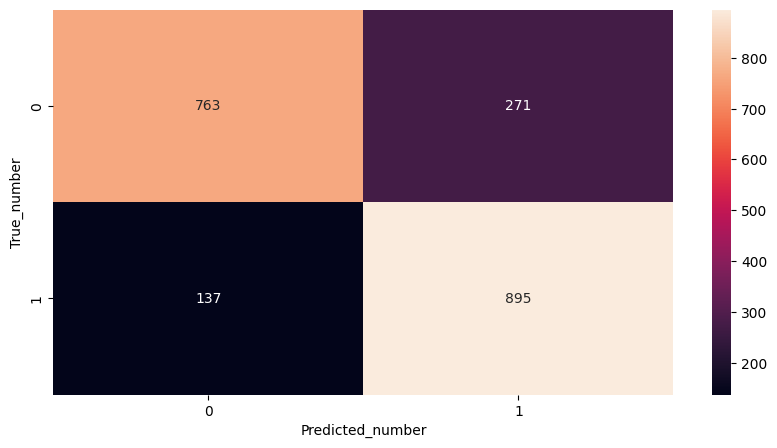

In [ ]:
NN_conf_mat = tf.math.confusion_matrix(labels=y_test, predictions=NN_ypred_lis)
plt.figure(figsize = (10,5))
sns.heatmap(NN_conf_mat, annot=True,fmt='d')
plt.xlabel('Predicted_number')
plt.ylabel('True_number')

Voici les détails de la matrice de confusion :

**Vrais négatifs (TN) :**  (prédit 0, vrai 0)

**Faux positifs (FP) :**  (prédit 1, vrai 0)

**Faux négatifs (FN) :**  (prédit 0, vrai 1)

**Vrais positifs (TP) :**  (prédit 1, vrai 1)

### La courbe ROC (AUC-ROC)

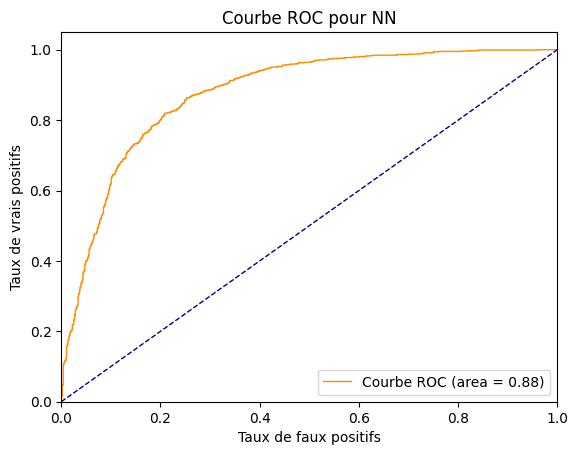

In [ ]:
# Calcul de la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, NN_ypred)

# Calcul de l'AUC
NN_roc_auc = auc(fpr, tpr)

# Visualisation de la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='Courbe ROC (area = %0.2f)' % NN_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC pour NN')
plt.legend(loc="lower right")
plt.show()

In [ ]:
data = {'orignal_churn':y_test, 'predicted_churn':NN_ypred_lis}
df_check = pd.DataFrame(data)
df_check

,orignal_churn,predicted_churn
4139,1,0
1692,0,0
2692,0,0
8628,1,1
321,0,0
...,...,...
4329,0,0
4528,1,0
8075,1,1
4730,0,1
